## Hypertension

### Import Packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load the Dataset


In [76]:
hypertension_df = pd.read_csv('/Users/vuthwatnakpiseth/DS-Disease_Prediction/Multi-Disease-Prediction/datasets/hypertension_data.csv')

hypertension_df.info()

hypertension_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Processing

In [77]:
# Check Missing Values
print("Missing values in each column:")
print(hypertension_df.isnull().sum())

# Drop rows with missing values
hypertension_df = hypertension_df.dropna()

# Verify that missing values are dropped
print("Missing values after dropping rows:")
print(hypertension_df.isnull().sum())


Missing values in each column:
age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64
Missing values after dropping rows:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [78]:

# Check unique values
print('Unique Value : \n',hypertension_df.nunique())



Unique Value : 
 age          88
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [79]:
# Check for duplicates
print('Number of duplicate : ',hypertension_df.duplicated().sum())


Number of duplicate :  0


In [80]:
 # Define feature categories
binary_columns = ['sex', 'fbs', 'exang', 'target']
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
ordinal_columns = ['ca']
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Check Outliers


In [81]:
# Define feature categories
binary_columns = ['sex', 'fbs', 'exang', 'target']
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
ordinal_columns = ['ca']
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

def find_outliers_hypertension(hypertension_df):
    print("Outliers Detected:")
    print("===================")
    
    # Loop through continuous columns only
    for column in continuous_columns:
        if column in hypertension_df.columns:  # Ensure the column exists in the dataframe
            Q1 = hypertension_df[column].quantile(0.25)
            Q3 = hypertension_df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outlier_values = hypertension_df[(hypertension_df[column] < lower_bound) | 
                                             (hypertension_df[column] > upper_bound)][column].tolist()
            
            if outlier_values:
                print(f"\nColumn: {column} - Total Outliers: {len(outlier_values)}")    
                print(f"Outliers: {outlier_values}")
            else:
                print(f"\nColumn: {column}")
                print("No outliers detected.")
    
    print("===================")
    print("Outlier detection complete.")

# Example Usage
find_outliers_hypertension(hypertension_df)

Outliers Detected:

Column: age
No outliers detected.

Column: trestbps - Total Outliers: 794
Outliers: [172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 192, 180, 172, 178, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 192, 178, 180, 172, 178, 180, 180, 200, 192, 178, 180, 172, 180, 200, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 172, 178, 180, 180, 200, 174, 192, 178, 180, 180, 180, 200, 192, 178, 172, 180, 180, 200, 174, 192, 178, 180, 178, 180, 180, 200, 174, 192, 180, 180, 180, 200, 174, 178, 180, 178, 180, 180, 200, 174, 192, 178, 180, 178, 180, 200, 192, 180, 172, 178, 180, 180, 174, 192, 178, 180, 

In [82]:
def remove_outliers_from_continuous_columns(hypertension_df, continuous_columns):
    print("Removing Outliers:")
    print("===================")
    
    # Loop through continuous columns only
    for column in continuous_columns:
        if column in hypertension_df.columns:  # Ensure the column exists in the dataframe
            Q1 = hypertension_df[column].quantile(0.25)
            Q3 = hypertension_df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove outliers (values outside the bounds)
            hypertension_df = hypertension_df[(hypertension_df[column] >= lower_bound) & 
                                              (hypertension_df[column] <= upper_bound)]
            print(f"Outliers removed from column: {column}")
    
    print("===================")
    print("Outlier removal complete.")
    
    return hypertension_df

# Example Usage
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
hypertension_df_cleaned = remove_outliers_from_continuous_columns(hypertension_df, continuous_columns)
print("Shape before removal : ",hypertension_df.shape)
print("Shape after removal : ",hypertension_df_cleaned.shape)



Removing Outliers:
Outliers removed from column: age
Outliers removed from column: trestbps
Outliers removed from column: chol
Outliers removed from column: thalach
Outliers removed from column: oldpeak
Outlier removal complete.
Shape before removal :  (26058, 14)
Shape after removal :  (24422, 14)


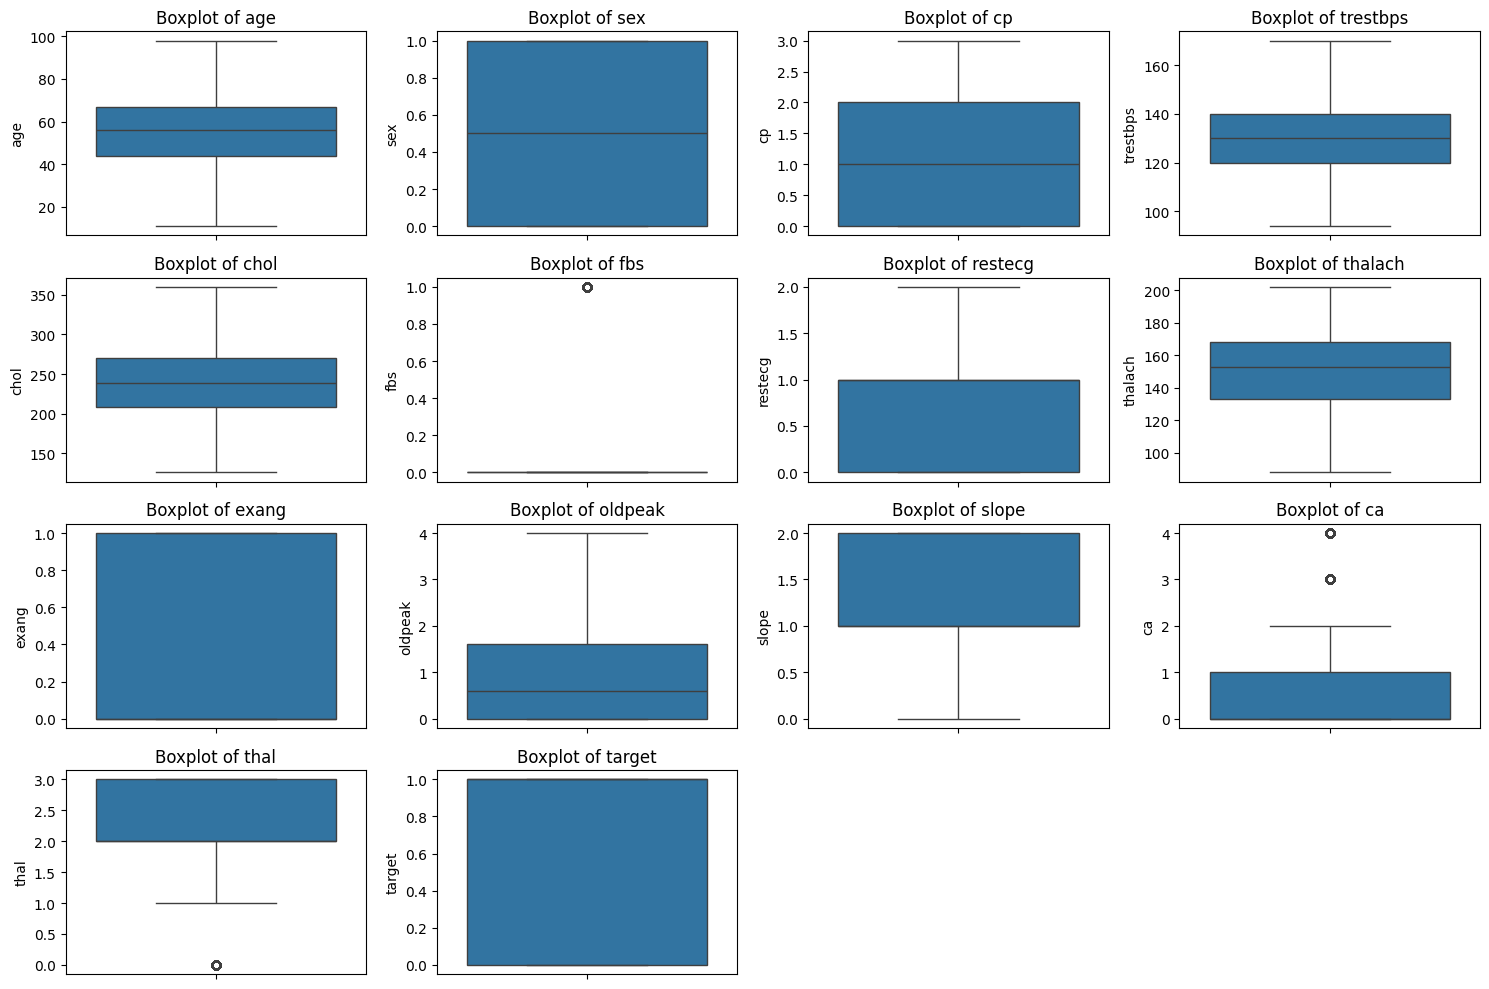

In [83]:
# Plot boxplots for all features to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(hypertension_df_cleaned.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=hypertension_df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

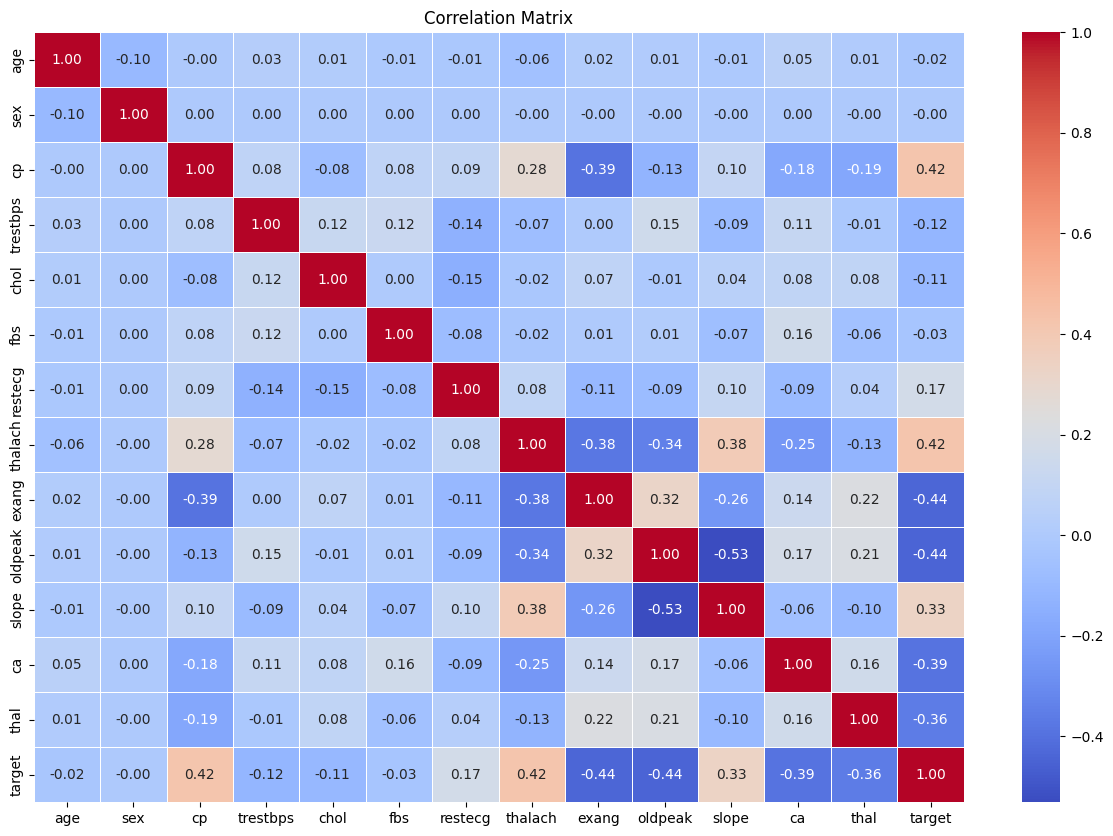

In [84]:
# Compute the correlation matrix
correlation_matrix = hypertension_df_cleaned.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix Analysis

#### Key Observations:

##### 1. **Strongest Positive Correlations:**
- **cp (chest pain type) and target: 0.42**
  - This indicates that as chest pain type (likely atypical angina or non-anginal pain) increases, the likelihood of heart disease also increases.
  
- **thalach (maximum heart rate achieved) and target: 0.42**
  - A positive relationship between maximum heart rate and the presence of heart disease.

##### 2. **Strongest Negative Correlations:**
- **exang (exercise-induced angina) and target: -0.44**
  - Exercise-induced angina has a significant negative correlation with heart disease. If a patient has angina during exercise, the likelihood of heart disease decreases.

- **oldpeak (ST depression) and target: -0.44**
  - Higher ST depression (indicative of stress during exercise) is negatively correlated with heart disease presence.

##### 3. **Moderate Correlations:**
- **slope and target: 0.33**
  - The slope of the ST segment has a moderate positive correlation with heart disease.

- **thal and target: -0.36**
  - The thallium stress test result shows a moderate negative correlation with heart disease.

##### 4. **Negligible or Low Correlations:**
- **age and target: -0.02** (almost no correlation)
- **sex and target: 0.00** (no correlation)
- Variables like **trestbps**, **chol**, and **fbs** show weak or negligible relationships with target.

---

#### **Visual Summary:**
- **Highly correlated features:** cp, thalach, oldpeak, exang.
- **Weak or insignificant features:** age, sex, chol, fbs, trestbps.

---

#### **Insights for Feature Selection:**
- Focus on the variables with stronger correlations to target: **cp**, **thalach**, **oldpeak**, **exang**, and **slope**.
- Features with very weak correlations (**age**, **sex**, **chol**, **fbs**) may contribute less predictive power in a model.


In [85]:
# Keep relevant columns(cp, thalach, oldpeak, exang, slope, and thal)
relevant_features = ['cp', 'thalach', 'oldpeak', 'exang', 'slope', 'thal', 'target']
hypertension_df_cleaned_featurized = hypertension_df_cleaned[relevant_features]

hypertension_df_cleaned_featurized.head()



,cp,thalach,oldpeak,exang,slope,thal,target
0,3,150,2.3,0,0,1,1
1,2,187,3.5,0,0,2,1
2,1,172,1.4,0,2,2,1
3,1,178,0.8,0,2,2,1
4,0,163,0.6,1,2,2,1


#### Exploratory Data Analysis

##### Distribution Plots

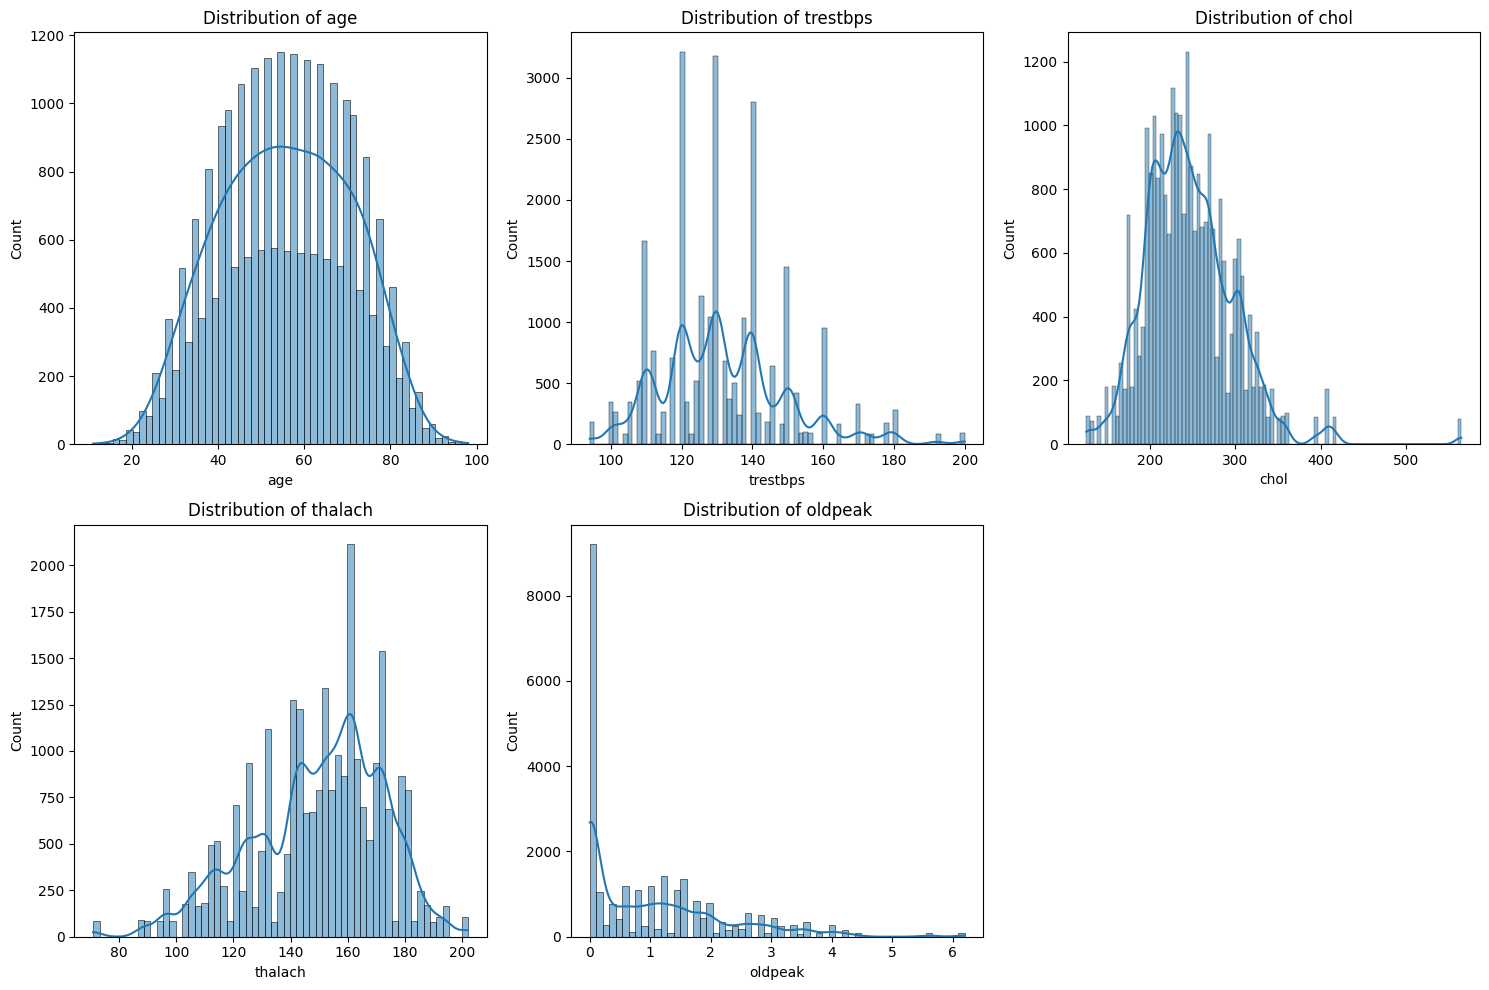

In [86]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(hypertension_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### Bloxplot features with target feature

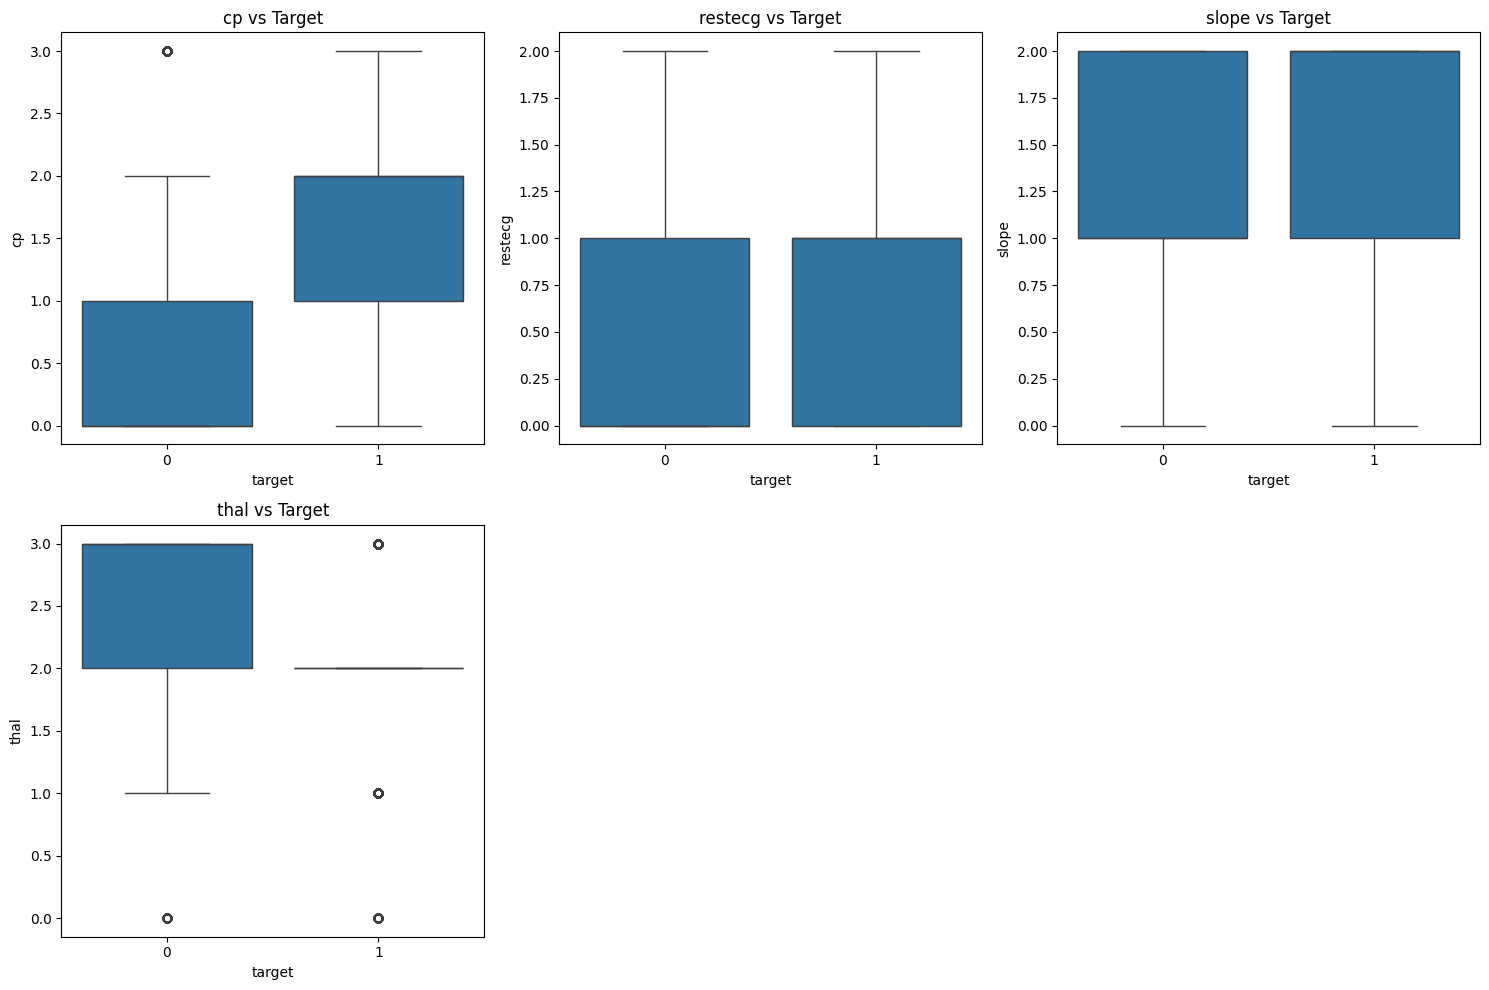

In [87]:
features_to_plot = ['cp', 'restecg', 'slope', 'thal']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=hypertension_df_cleaned)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

In [88]:
hypertension_df_cleaned.to_csv('/Users/vuthwatnakpiseth/DS-Disease_Prediction/Multi-Disease-Prediction/datasets/hypertension_cleaned.csv', index=False)